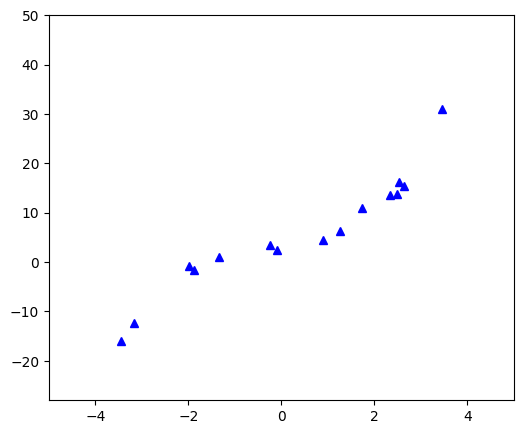

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 20개의 데이터 생성 & 시각화
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

#20개의 데이터를 학습용/테스트용 구분
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize=(6,5))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함
plt.plot(X_train, y_train, "b^") # 학습용 데이터 그리기

In [2]:
#다항 회귀 모델을 만들고 점수, 계수, 절편 출력
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#다항 특성을 20개가 되도록.
poly_features = PolynomialFeatures(degree = 20, include_bias = False)
X_poly = poly_features.fit_transform(X_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)
print('다항 회귀 모델의 점수=', regr.score(X_poly, y_train).round(3))

다항 회귀 모델의 점수= 1.0


In [3]:
print('다항 회귀 모델의 계수=', regr.coef_)
print('다항 회귀 모델의 절편=', regr.intercept_)

다항 회귀 모델의 계수= [[-4.06644377e+00  5.90130369e+00  1.56724041e+00  1.08530862e+00
   7.54160642e-01 -7.64707435e-01 -1.40310590e-01 -1.42120856e+00
  -6.16632097e-02 -5.13206654e-01  5.20265080e-01  9.00355293e-01
  -3.54421392e-01 -2.90862322e-01  8.69917138e-02  3.87111934e-02
  -8.66453587e-03 -2.32255075e-03  2.98346088e-04  5.21500872e-05]]
다항 회귀 모델의 절편= [2.06776083]


In [4]:
X_poly = poly_features.fit_transform(X_test)
print('다항 회귀 모델의 절편=', regr.score(X_poly, y_test))

다항 회귀 모델의 절편= -2226883156.7542267


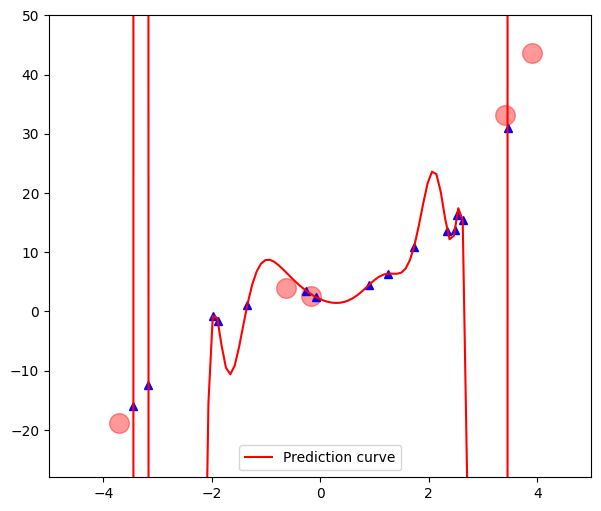

In [14]:
#다항 회귀 곡선을 생성하는 기능
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(7,6))
plt.xlim(-5, 5); plt.ylim(-28, 50) #x, y범위를 제한

#학습용 데이터와 다항 회귀 곡선을 그려보고 테스트 데이터고 그려보자
plt.plot(X_train, y_train, 'b^')
plt.scatter(X_test, y_test, c='red', s=200, alpha=0.4)
plt.plot(X_new, y_new, "r-", label="Prediction curve")
plt.legend()